# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute covariance matrix A^T A (correlation matrix)
    covariance_matrix = np.dot(X_train.T, X_train)
    
    # Step 2: Eigenvalue decomposition of covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 3: Select top 'n_components' eigenvectors (the principal components)
    selected_eigenvectors = eigenvectors[:, :n_components]
    
    # Step 4: Compute the reduced representation of X_train and X_test
    X_train_svd = np.dot(X_train, selected_eigenvectors)
    X_test_svd = np.dot(X_test, selected_eigenvectors)
    
    return X_train_svd, X_test_svd, eigenvectors, eigenvalues

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [784, 500, 200, 100, 50, 20]  # Test different numbers of components

# Store the results
results = []

for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to reduce the dimensionality
    X_train_svd, X_test_svd, eigenvectors, eigenvalues = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append((n_components, accuracy, training_time))
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Applying custom SVD with 784 components...


/Users/jonahgluck/miniconda3/envs/506/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 406.5444 seconds
Applying custom SVD with 500 components...


/Users/jonahgluck/miniconda3/envs/506/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 241.8950 seconds
Applying custom SVD with 200 components...


/Users/jonahgluck/miniconda3/envs/506/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 64.5317 seconds
Applying custom SVD with 100 components...


/Users/jonahgluck/miniconda3/envs/506/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 22.2631 seconds
Applying custom SVD with 50 components...


/Users/jonahgluck/miniconda3/envs/506/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 5.6003 seconds
Applying custom SVD with 20 components...


/Users/jonahgluck/miniconda3/envs/506/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8779, Training time: 0.5588 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


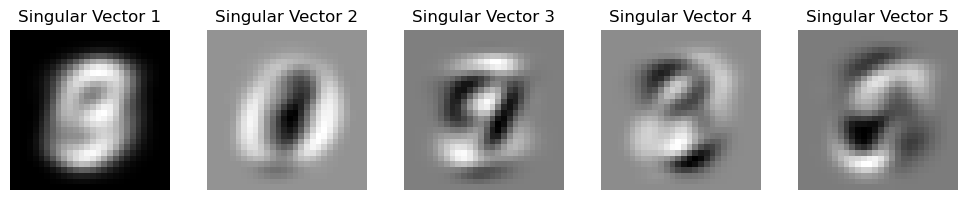

In [5]:
top_5_singular_vectors = eigenvectors[:, :5]

plt.figure(figsize=(10, 2))

for i in range(5):
    singular_vector_image = top_5_singular_vectors[:, i].reshape(28, 28)
    plt.subplot(1, 5, i + 1)
    plt.imshow(singular_vector_image, cmap='gray')
    plt.title(f'Singular Vector {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Part 6: Analyze / Conclusion 

For the MNIST dataset, reducing the dimensionality to around 200 components provides the optimal balance between accuracy and training time. Using all 784 components (i.e., no dimensionality reduction) provides the highest accuracy but comes at the cost of increased training time. Reducing the number of components to 200 still maintains a high accuracy that is comparable to using the full set of features, but with a significant reduction in training time. Further reducing the number of components (e.g., 100 or 50) results in a noticeable drop in accuracy, indicating that the model begins to lose important information needed for precise classification. With only 20 components, the accuracy drops more substantially, suggesting that too much information has been lost during dimensionality reduction.